<a href="https://colab.research.google.com/github/Navneet2409/Airbnb-Booking-Analysis/blob/main/Airbnb_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Airbnb Bookings Analysis - Navneet Keshri/Airbnb NYC 2019.csv')

## <b>Introduction to Airbnb

#####<b>1. Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.
#####<b>2. Airbnb offers people an easy, relatively stress-free way to earn some income from their property.
#####<b>Guests often find Airbnb is cheaper, has more character, and is homier than hotels.
#####<b>3. Airbnb makes the bulk of its revenue by charging a service fee for each booking.
#####<b>4. Cons of using this service include not getting what you expected, and, for hosts, renting your place to someone you haven’t had the chance to meet first.

#<b> Problem Statements - 
##### 1. Do the EDA of the given dataset using Numpy and Pandas, and find the relationship between different variables.
##### 2. Find out variables that are important for Airbnb from a business perspective.
##### 3. Do the cost and revenue analysis and find out groups where Airbnb can focus to increase its profit.
##### 4. Analyze the sentiment from ratings of the customers. Find out the relationship between price and user's rating if there is any. 
##### 5. Simultaneously do the Data Visualization using Matplotlib and Seaborn. Plot the bar graph, pie chart, etc to understand the relationship in a better manner.

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##<b> Below is a description of the columns/variables in our dataset</b>
* id - a unique identifier.
* name - hotel or apartment name.
* host_id - assigned id to host  (considering different hotels for the
same host_id because of location)
* host_name - the name of the host (one person can stay in a different hotel/apartment)
* neighbourhood_group - an area where the hotel belongs to (5 groups - Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* neighbourhood - many sub-areas belong to 5 groups where hotels are situated (consider as towns under the district)
* latitude - latitude coordinates for the location of the hotel.
* longitude- longitude coordinates for the location of the hotel.
* room_type - 3 types of rooms which are (entire home/apt, private room, shared room)
* price	- from 0 to 10000$ 
* minimum_nights - ranging from 1 to 1250.
* number_of_reviews - number of reviews for the hotel by users.
* last_review - last date when a hotel/apartment is reviewed by the user.
* reviews_per_month	- how many reviews the hotel gets per month.
* calculated_host_listings_count - Number of times the listing is done by a particular host (count of aparticular hotel name in the data rows)
* availability_365 - values ranged from 0 to 365 as per the availability (number of days in a year)

## <b>EDA

In [ ]:
# checking first 5 rows
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# checking last 5 rows
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
airbnb.shape      # shape is an attribute used to check the shape (rows, columns) of the dataset

(48895, 16)

In [ ]:
airbnb.info()     # a brief info about the dataset with a count of null, non-null values, and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.columns      # give names of all the columns as a list

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb.describe()    # describes the data with min, max, mean, median, etc.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# checking categorical and numerical columns
categorical_columns = airbnb.select_dtypes(include = 'object').columns
print(f'categorical columns are {categorical_columns}')

categorical columns are Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [ ]:
numerical_columns = airbnb.select_dtypes(exclude ='object').columns
print(f'numerical columns are {numerical_columns}')

numerical columns are Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


### Checking the dataset column by column

In [ ]:
airbnb['id'].value_counts()             # This show this is a unique identification number

2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64

In [ ]:
airbnb['name'].value_counts()           # name of the hotel or apartment listed by local host

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
airbnb['host_id'].value_counts()              # Identification number of the local host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
airbnb[airbnb['host_id'] == 219517861]         # the same host_id given to a different names too.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [ ]:
airbnb['host_name'].value_counts()         # name of the host(local owner of hotel/apartment)

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
airbnb['neighbourhood_group'].value_counts()             # 5 neighbourhood_groups

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
airbnb['neighbourhood'].value_counts()                   # inside neighbourhood_groups multiple neighbourhoods are there

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
airbnb['room_type'].value_counts()              #3 Type of rooms

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
airbnb['price'].value_counts()               # rent price

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [ ]:
airbnb['price'].min(),airbnb['price'].max()

(0, 10000)

In [ ]:
(airbnb['price'] == 0).value_counts()              # These 11 rows need to be neglected as the price cannot be 0

False    48884
True        11
Name: price, dtype: int64

In [ ]:
airbnb['minimum_nights'].min(), airbnb['minimum_nights'].max()     # number of nights room is rented for

(1, 1250)

In [ ]:
airbnb['minimum_nights'].sort_values(ascending = False)   # seems like some outliers are there still we are going to neglect it

5767     1250
2854     1000
38664     999
13404     999
26341     999
         ... 
38503       1
38504       1
13834       1
28305       1
0           1
Name: minimum_nights, Length: 48895, dtype: int64

In [ ]:
airbnb['number_of_reviews'].min(), airbnb['number_of_reviews'].max()    # number_of review can be good data to analyze sentiment and ratings

(0, 629)

In [ ]:
airbnb['last_review']                # date of the last review, a lot of null values

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [ ]:
airbnb['reviews_per_month']        # review per month, a lot of null values are here too

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
airbnb[airbnb['host_name'] == 'Hillside Hotel'] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


In [ ]:
airbnb['calculated_host_listings_count'].min(), airbnb['calculated_host_listings_count'].max()    # count of host listing

(1, 327)

In [ ]:
airbnb['calculated_host_listings_count'].value_counts()

1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: calculated_host_listings_count, dtype: int64

In [ ]:
airbnb[airbnb['host_name'] == 'Hillside Hotel'] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


In [ ]:
airbnb['availability_365'].min(), airbnb['availability_365'].max()  # availability in number of days which cannot be 0 we need to clean it

(0, 365)

##<b> Data Cleaning

In [ ]:
# checking for the null values in the dataset
airbnb.isna().sum()            

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Fixing the null values
### Drop the rows of a column which have less number of null values (name,host_name)
### We can drop the null values from columns last_review and reviews_per_month as it contains a lot of null values but in the analysis, it is not so useful so we are just neglecting it.

In [ ]:
airbnb = airbnb.dropna(subset=['name', 'host_name'])   # axis =0 is the default value to drop rows of specified columns

In [ ]:
airbnb.shape

(48858, 16)

In [ ]:
# Checking for null values again
airbnb.isna().sum()                            # we can just ignore last_review and reviews_per_month column or even can drop it

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
mean_availability = int(airbnb['availability_365'].mean())  # Replcing the 0 values in availabilty_365 column with mean of it
mean_availability

112

In [ ]:
airbnb['availability_365'] = airbnb['availability_365'].replace(0,mean_availability)

In [ ]:
# checking it again
airbnb['availability_365'].min(), airbnb['availability_365'].max()    # Now it is good

(1, 365)

In [ ]:
# Cleaning price column
airbnb['price'].min(),airbnb['price'].max()     # some 0 values are there in the price column

(0, 10000)

In [ ]:
(airbnb['price'] == 0).value_counts()    # These 11 rows need to be neglected (assuming the price cannot be 0)

False    48847
True        11
Name: price, dtype: int64

In [ ]:
airbnb['price'].mean()           # average including zero values

152.74030864955586

In [ ]:
price_df = pd.DataFrame(airbnb['price'])               # creating a dataframe for the price column
avg_price = price_df[price_df['price'] != 0].mean()    # average of the price excluding 0 values
avg_price                                              # not a significant change in average price still needs to be checked


price    152.774705
dtype: float64

In [ ]:
airbnb.shape                 # shape after data cleaning

(48858, 16)

## Data Analysis and Visualization

In [ ]:
import matplotlib.pyplot as plt        # using matplotlib and seaborn for visualization
import seaborn as sns
%matplotlib inline

In [ ]:
max_host_name = airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max()
max_host_name = max_host_name.sort_values(ascending =False).reset_index().head()
max_host_name

,host_name,neighbourhood_group,calculated_host_listings_count
0,Sonder (NYC),Manhattan,327
1,Blueground,Brooklyn,232
2,Blueground,Manhattan,232
3,Kara,Manhattan,121
4,Kazuya,Brooklyn,103


Text(0, 0.5, 'Count of listings')

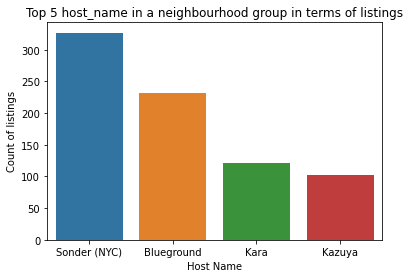

In [ ]:
ax = sns.barplot(data = max_host_name, x = 'host_name', y = 'calculated_host_listings_count')
ax.set_title('Top 5 host_name in a neighbourhood group in terms of listings')
ax.set_xlabel('Host Name')
ax.set_ylabel('Count of listings')

#### Host name Sonder has a maximum listing which is 327

In [ ]:
overall_most_listed_host_name = airbnb['host_name'].value_counts().reset_index().head()
overall_most_listed_host_name

,index,host_name
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279


Text(0, 0.5, 'Number of listings')

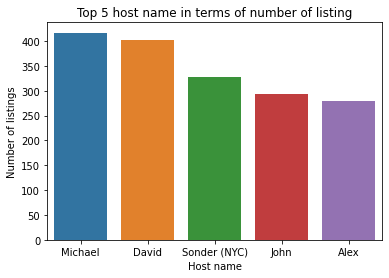

In [ ]:
ax = sns.barplot(data = overall_most_listed_host_name, x = 'index', y = 'host_name')
ax.set_title('Top 5 host name in terms of number of listing')
ax.set_xlabel('Host name')
ax.set_ylabel('Number of listings')

### Michael has a maximum count in host_name which means Sonder has listings only in Manhattan but Michael has listings in different neighbourhood_groups or maybe there are multiple Michael as host_name

In [ ]:
neighbourhood_groups = airbnb['neighbourhood_group'].value_counts()
neighbourhood_groups

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

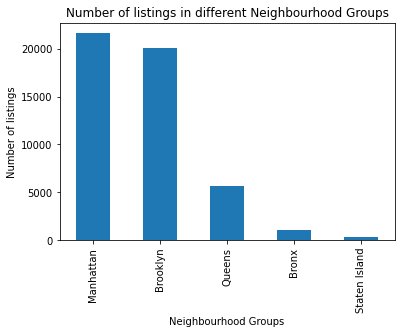

In [ ]:
# creating the plot for it
neighbourhood_groups.plot(kind ='bar')

plt.title('Number of listings in different Neighbourhood Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of listings')

# Set the display figure size using rcParams
plt.rcParams['figure.figsize'] = (10, 5)

#### Manhattan has the most number of listings followed by Brooklyn. Staten Island has least number of listings.


In [ ]:
room_type = airbnb['room_type'].value_counts()
room_type

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

Text(0, 0.5, 'Number of Rooms')

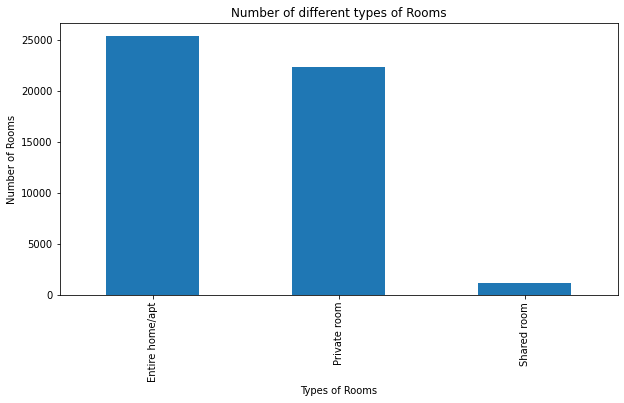

In [ ]:
# creating a plot for price
room_type.plot(kind ='bar')

plt.title('Number of different types of Rooms')
plt.xlabel('Types of Rooms')
plt.ylabel('Number of Rooms')

#### The entire home/apartment is the most preferred room type followed by a private room. Shared room is preferred rarely.


In [ ]:
room_type_vs_price = airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
room_type_vs_price

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


Text(0, 0.5, 'Average Price')

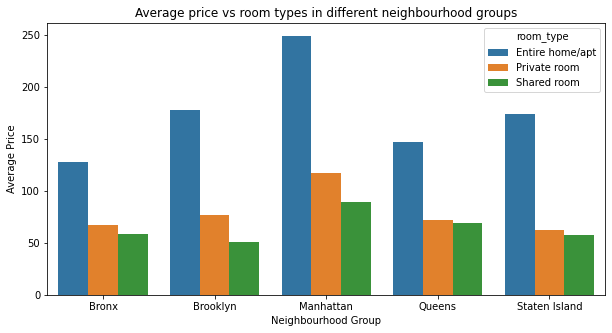

In [ ]:
ax = sns.barplot(data = room_type_vs_price,x = 'neighbourhood_group', y = 'price', hue = 'room_type')
ax.set_title('Average price vs room types in different neighbourhood groups')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average Price')

#### Entire home/apt is the most preferred room type even though it is the most costly in all the neighbourhood groups

# Business Analysis - Let's get deeper into data from a business perspective

In [ ]:
# calculate and visualize the percentage of hotels/apartments in different neighbourhood_group

group_count = airbnb.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'})
group_count

,neighbourhood_group,count
0,Bronx,1089
1,Brooklyn,20089
2,Manhattan,21643
3,Queens,5664
4,Staten Island,373


Text(0.5, 1.0, 'Percentage of listing in each neighbourhood_group')

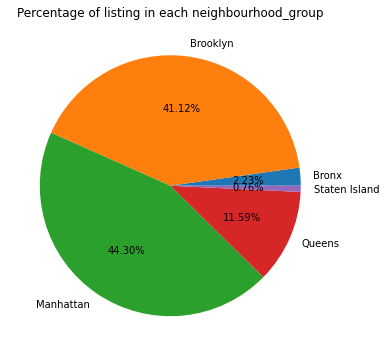

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

plt.pie(group_count['count'], labels = group_count['neighbourhood_group'],autopct ='%0.2f%%')
plt.title('Percentage of listing in each neighbourhood_group')


#### This shows that 85% of listing on Airbnb comes from Manhattan and Brooklyn (important from a business perspective)

### Now let's check out Average length of stay (ALOS) - Imp Business KPI

In [ ]:
alos = airbnb['minimum_nights'].mean()
alos

7.012444226124688

In [ ]:
# alos per neighbourhood_group
group_alos=airbnb.groupby(['neighbourhood_group'])['minimum_nights'].mean().reset_index().rename(columns = {'minimum_nights':'average_nights'})
group_alos

,neighbourhood_group,average_nights
0,Bronx,4.564738
1,Brooklyn,6.057693
2,Manhattan,8.538188
3,Queens,5.182910
4,Staten Island,4.831099


Text(0, 0.5, 'Average nights spend')

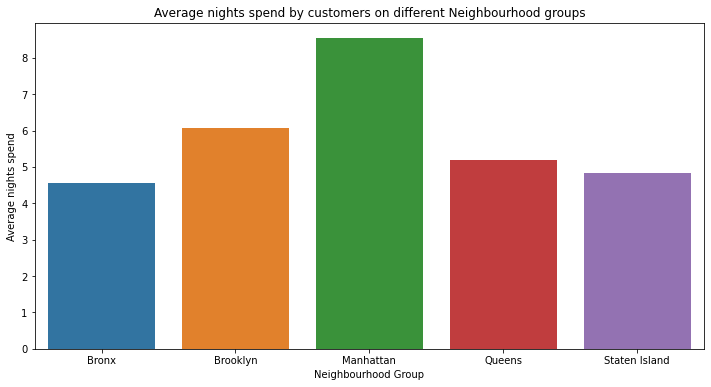

In [ ]:
# checking it in the graph
ax = sns.barplot(x = 'neighbourhood_group', y = 'average_nights', data = group_alos)
ax.set_title('Average nights spend by customers on different Neighbourhood groups')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average nights spend')

#### This again shows the importance of Manhattan and Brooklyn from a business point of view but this may be due to most number of hotels/apartments located in Manhattan and Brooklyn

### Most popular neighbourhoods


In [ ]:
popular_neighbourhoods = airbnb.groupby(['neighbourhood','neighbourhood_group'])['calculated_host_listings_count'].count()
popular_neighbourhoods = popular_neighbourhoods.sort_values(ascending =False).head(5).reset_index()
popular_neighbourhoods

,neighbourhood,neighbourhood_group,calculated_host_listings_count
0,Williamsburg,Brooklyn,3917
1,Bedford-Stuyvesant,Brooklyn,3713
2,Harlem,Manhattan,2655
3,Bushwick,Brooklyn,2462
4,Upper West Side,Manhattan,1969


Text(0, 0.5, 'Number of listing')

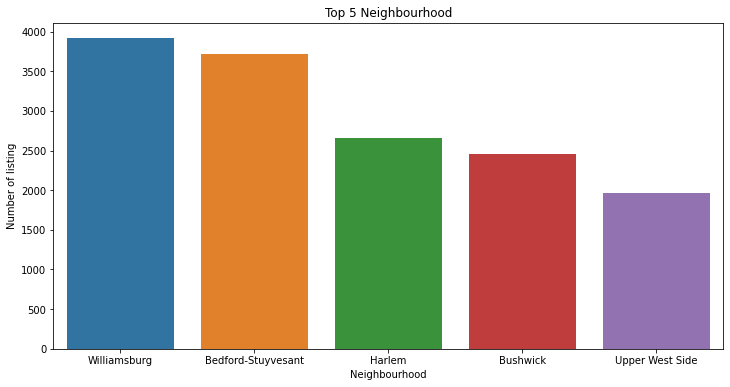

In [ ]:
ax=sns.barplot(x=popular_neighbourhoods['neighbourhood'],y=popular_neighbourhoods['calculated_host_listings_count'],data=popular_neighbourhoods)
ax.set_title('Top 5 Neighbourhood')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of listing')

#### Top 5 neighbourhoods are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, Upper West Side	

# Financial Analysis (Cost and Revenue Analysis)


In [ ]:
# Now let's calculate the average price per neighbourhood group
group_avg_price = airbnb.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns={'price':'average_price'})
group_avg_price

,neighbourhood_group,average_price
0,Bronx,87.469238
1,Brooklyn,124.410523
2,Manhattan,196.897473
3,Queens,99.536017
4,Staten Island,114.812332


Text(0, 0.5, 'Average Price')

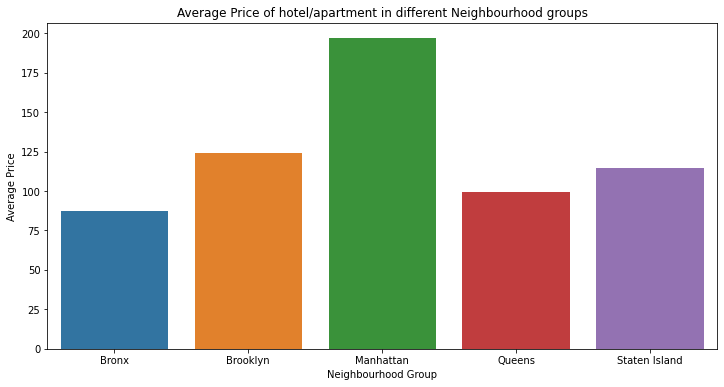

In [ ]:
# creating a bar plot
ax = sns.barplot(x = group_avg_price['neighbourhood_group'], y =group_avg_price['average_price'], data = group_avg_price )
ax.set_title('Average Price of hotel/apartment in different Neighbourhood groups')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average Price')

#### Although Manhattan and Brooklyn have the highest number of hotels yet they are costly, which means they are important from the finance point of Airbnb. ( Focus on local hosts for better service)

#### Important to note that Staten Island was not in the top 3 in the number of listings yet it is in the top 3 in the average price of the hotel which may be because not enough hotels in Staten Island. (Airbnb should focus on listing more hotels/apartments from Staten Island)

### Total Revenue of all local_hosts

In [ ]:
total_revenue = airbnb['price'].sum()    # in USD
total_revenue                            # If we have a gross margin of Airbnb we can calculate the profit earned by Airbnb from these listings

7462586

In [ ]:
revenue_per_group = airbnb.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns ={'price':'average_price'})
revenue_per_group

,neighbourhood_group,average_price
0,Bronx,87.469238
1,Brooklyn,124.410523
2,Manhattan,196.897473
3,Queens,99.536017
4,Staten Island,114.812332


Text(0, 0.5, 'Average Price')

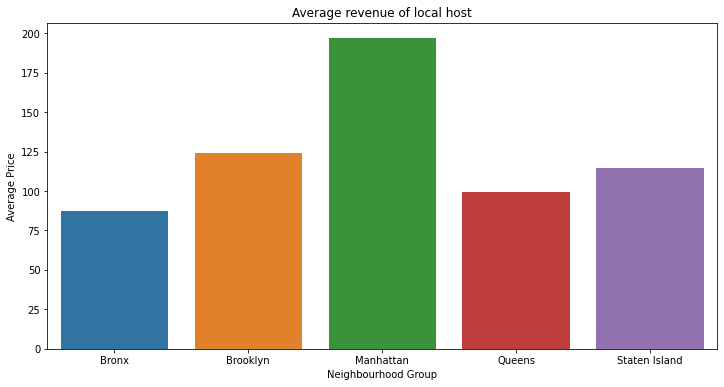

In [ ]:
ax = sns.barplot(x = revenue_per_group['neighbourhood_group'], y = revenue_per_group['average_price'], data = revenue_per_group)
ax.set_title('Average revenue of local host')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average Price')

#### From a local host point of view –The average revenue of a local host per neighbourhood group can be a good criterion to analyze revenue from different neighbourhood groups -This data is similar to the price per neighbourhood group


#Sentiment Analysis

In [ ]:
# Now let's check out the number of reviews per neighnourhood_group

airbnb['number_of_reviews'].sort_values(ascending = False)

11759    629
2031     607
2030     597
2015     594
13495    576
        ... 
14481      0
4694       0
14482      0
26363      0
48894      0
Name: number_of_reviews, Length: 48858, dtype: int64

In [ ]:
group_host_reviews = airbnb.groupby(['neighbourhood_group','host_name'])['number_of_reviews'].max().reset_index()
group_host_reviews = group_host_reviews.sort_values(by='number_of_reviews', ascending = False).head(5)
group_host_reviews

,neighbourhood_group,host_name,number_of_reviews
13253,Queens,Dona,629
9318,Manhattan,Jj,607
14211,Queens,Maya,543
7634,Manhattan,Carol,540
13174,Queens,Danielle,510


Text(0, 0.5, 'Number of reviews')

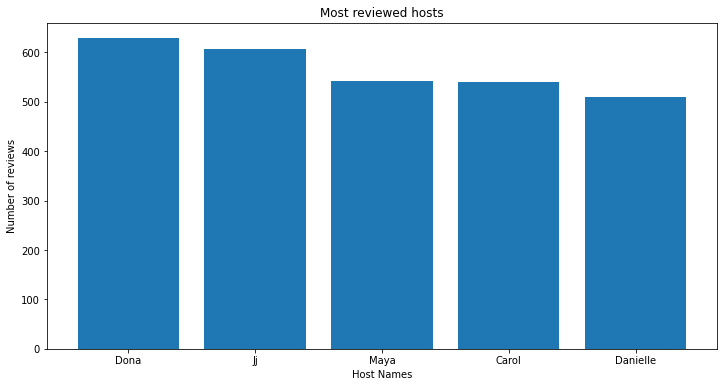

In [ ]:
plt.bar(group_host_reviews['host_name'], group_host_reviews['number_of_reviews'])
plt.title('Most reviewed hosts')
plt.xlabel('Host Names')
plt.ylabel('Number of reviews')

#### Most rated local hosts are Dona, Jj, Maya, Carol, and Danielle

Text(0, 0.5, 'Max number of reviews')

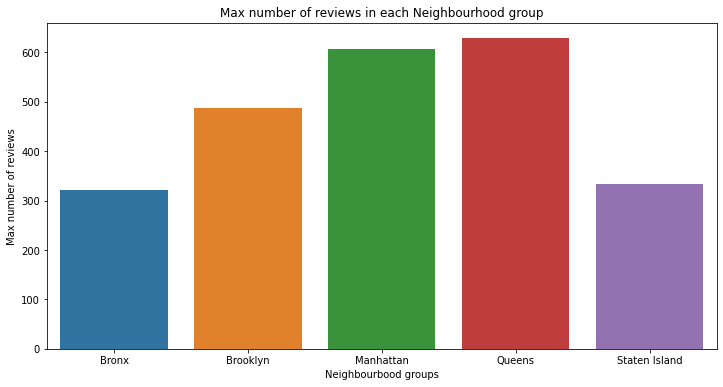

In [ ]:
group_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()

ax = sns.barplot(x = group_reviews['neighbourhood_group'],y = group_reviews['number_of_reviews'], data = group_reviews)
ax.set_title('Max number of reviews in each Neighbourhood group')
ax.set_xlabel('Neighbourbood groups')
ax.set_ylabel('Max number of reviews')

In [ ]:
most_rated_hotel = airbnb.groupby(['name'])['number_of_reviews'].max().sort_values(ascending = False).head(1)
most_rated_hotel               # This hotel name has the maximum number of reviews in all areas (located in the Queens area)

name
Room near JFK Queen Bed    629
Name: number_of_reviews, dtype: int64

#### This shows that even though Manhattan and Brooklyn have a max number of listings yet the max number of reviews belongs to Queens which means at least one hotel in Queens is very popular among the users.
#### Most rated hotel/apartment name - Room near JFK Queen Bed

In [ ]:
availability_vs_avg_price = airbnb.groupby(['availability_365'])['price'].mean().reset_index().rename(columns ={'price':'average_price'})
availability_vs_avg_price.head()    # Here availabilty cannot be 0 with average price of some values we need to clean it

,availability_365,average_price
0,1,129.509804
1,2,145.944444
2,3,136.486928
3,4,135.759657
4,5,134.179412


In [ ]:
airbnb['availability_365'].value_counts()

112    17559
365     1294
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 365, dtype: int64

Text(0, 0.5, 'Average Price')

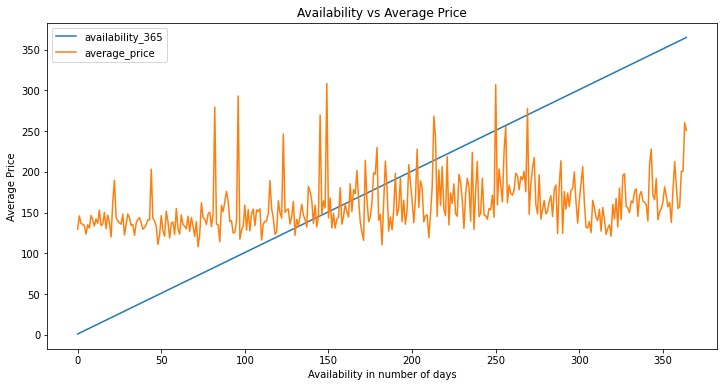

In [ ]:
availability_vs_avg_price.plot()
plt.title('Availability vs Average Price')
plt.xlabel('Availability in number of days')
plt.ylabel('Average Price')

#### There is no significant relationship between availability and average price but the price shoots up from an average of USD 150 to USD 250-300 in some cases which may be hotel/apartment specific.

#<b> Major Findings </b> -
1. Manhattan has the most number of listings (85% of listing on Airbnb come from Manhattan and Brooklyn) with the Host name Sonder having a maximum listing which is 327 in Manhattan.
2.  Manhattan and Brooklyn are also important from a business point of view as the average price of a hotel/apartment is the highest. But important to note that Staten Island was not in the top 3 in number of listings yet it is in the top 3 in the average price of the hotels. 
3. Even though Manhattan and Brooklyn have a max number of listings yet the max number of reviews belongs to Queens which means at least one hotel in Queens is very popular among the users. Most rated hotel/apartment name - Room near JFK Queen Bed
4. There is no significant relationship between availability and average price but the price shoots up from an average of USD 150 to USD 250-300 in some cases which may be hotel/apartment specific.
5. Top 5 neighbourhoods are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and Upper West Side. The entire home is the most preferred room type.
6. People prefer to stay in entire home/apt and Private rooms that is why average price of private rooms are higher than

##<b>Conclusion:
*   Through this Exploratory Data Analysis (EDA) we analyzed Airbnb Bookings Analysis using Pandas and used Seaborn and Matplotlib for the visualization purpose. 
*   Started with understanding the variables, we prepared the data after cleaning it and found the relationship between variables.
*   We also did analyze the data from a business perspective, financial perspective, and sentiment perspective. We used Data Visualization for a better understanding and presentation purpose.
*   Area of focus and assumptions has been clearly stated whenever required. Now is up to Airbnb to utilize this analysis efficiently:)</b>




